<a href="https://colab.research.google.com/github/PhamBaVuong/DataAnalysisDeepLearning/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving processed_dulieuxettuyendaihoc.csv to processed_dulieuxettuyendaihoc.csv


In [2]:
import pandas as pd
import io

In [3]:
dlxtdh = pd.read_csv(io.StringIO(uploaded['processed_dulieuxettuyendaihoc.csv'].decode('utf-8')))

Phần 1

1. Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần

In [4]:
dlxtdh.sort_values(by = 'DH1')

,Unnamed: 0,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT
53,53,54,4.9,5.9,6.2,5.6,5.9,5.0,7.0,5.6,6.1,7.1,6.4,6.0,6.3,5.5,6.2,6.6,2.5,4.8,5.0,5.0,4.5,2.4,5.8,3.7,6.2,4.1,4.4,5.2,4.1,6.3,4.9,4.6,4.9,5.2,4.9,5.5,5.5,4.6,5.5,5.4,6.5,7.5,6.1,5.6,5.2,5.7,5.6,6.3,M,0.0,1,1.00,5.50,4.25,A,5.69,6.26,6.02,TB,TB,TB,2.276,2.504,2.408,0.0
43,43,44,6.6,7.2,5.9,6.9,7.6,8.1,7.3,6.7,6.3,6.9,6.0,6.4,7.0,7.1,6.9,6.2,6.7,7.1,5.4,6.8,6.8,5.9,6.6,6.8,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,5.8,5.9,5.8,4.6,6.6,4.0,6.0,6.2,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,F,1.0,2,1.25,3.50,5.00,D1,7.05,6.61,6.77,K,K,K,2.820,2.644,2.708,0.0
72,72,73,5.5,6.6,7.2,7.6,5.5,6.7,6.7,5.2,6.0,6.8,6.3,7.2,4.9,4.8,6.6,5.3,4.6,5.5,5.5,7.1,5.2,6.1,7.1,5.4,5.2,4.7,5.8,6.3,5.7,5.6,5.2,5.3,5.2,5.5,6.3,6.6,6.1,6.5,5.3,5.2,6.1,6.2,7.3,7.8,5.5,5.9,6.3,5.5,M,0.0,1,1.50,4.50,5.50,A,6.20,5.88,6.22,TB,TB,TB,2.480,2.352,2.488,0.0
5,5,6,9.3,7.6,7.9,8.6,7.0,7.3,7.7,7.9,9.6,7.8,8.0,8.7,7.7,8.0,9.2,9.1,7.1,8.5,8.1,8.7,7.2,8.4,7.7,8.2,8.5,8.5,7.7,9.2,8.0,6.6,7.3,8.8,8.5,7.6,8.1,9.0,8.4,6.6,6.6,8.2,7.8,6.4,7.2,7.7,7.7,5.7,8.0,7.8,M,0.0,1,1.50,4.00,6.00,D1,7.96,8.54,7.38,K,G,K,3.184,3.416,2.952,0.0
87,87,88,7.3,4.3,5.3,5.8,4.9,3.7,5.6,5.3,5.9,6.0,6.3,5.9,5.0,6.6,6.6,4.6,7.1,6.3,7.3,6.7,6.5,5.4,6.7,5.5,7.7,5.4,7.5,7.1,6.8,5.8,6.8,6.5,7.9,5.9,5.9,5.9,5.7,6.1,6.8,6.7,6.6,6.4,6.9,5.7,6.4,6.4,7.2,6.2,M,0.0,1,1.75,4.00,4.50,A,5.44,5.78,6.48,TB,TB,TB,2.176,2.312,2.592,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,85,8.4,7.4,6.0,7.8,6.3,7.2,8.5,6.0,9.3,7.0,8.5,8.8,6.9,6.9,7.3,6.8,7.4,7.0,8.0,7.5,7.1,6.7,8.4,5.8,7.7,6.7,8.2,7.5,7.5,6.1,8.1,6.5,8.2,5.9,7.9,8.6,6.1,5.1,7.2,6.1,8.6,7.8,8.9,8.5,6.7,5.5,7.9,6.6,M,0.0,1,6.50,4.50,8.00,A,7.23,7.77,7.58,K,K,K,2.892,3.108,3.032,1.0
11,11,12,7.9,7.0,9.1,8.6,6.1,7.0,5.6,9.0,8.2,7.1,8.8,7.6,6.9,7.3,7.2,9.0,8.1,8.4,8.5,7.6,5.5,8.0,6.6,8.6,6.9,7.0,8.9,8.6,5.6,5.3,7.1,8.3,8.0,7.8,8.6,7.3,6.2,3.9,5.7,8.6,8.1,7.9,8.3,7.9,6.4,6.4,6.7,8.7,M,0.0,2,6.75,6.50,4.25,D1,7.43,7.72,7.49,K,K,K,2.972,3.088,2.996,1.0
23,23,24,5.3,6.3,5.7,6.9,5.9,7.5,6.6,5.1,6.4,6.9,4.7,7.4,6.1,8.4,6.4,4.4,6.1,5.8,5.1,7.4,6.7,7.1,6.7,4.3,5.0,3.5,4.5,7.3,6.1,8.8,7.9,3.9,5.3,5.5,6.3,6.7,6.7,7.5,6.7,4.5,6.1,6.8,6.4,6.4,7.6,8.8,6.1,5.2,M,0.0,2NT,6.75,5.25,5.00,C,6.05,6.32,6.71,TB,TB,K,2.420,2.528,2.684,1.0
24,24,25,2.4,4.1,3.6,5.5,5.9,5.6,4.9,4.2,3.3,5.7,4.9,5.3,5.7,4.5,5.6,4.8,3.9,4.6,4.6,6.9,5.7,8.0,5.1,4.7,3.3,5.3,5.6,6.9,7.2,7.3,6.1,3.6,4.4,5.0,4.4,5.6,6.8,4.0,5.0,5.2,3.8,6.3,4.5,6.6,7.1,4.1,5.7,5.1,F,0.0,1,7.00,2.25,5.25,C,4.45,4.88,5.41,Y,Y,TB,1.780,1.952,2.164,0.0


2. Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính

In [26]:
df_nam = dlxtdh.loc[dlxtdh["GT"] == 'M'].sort_values(by = 'DH2')
df_nam.head(10)

,Unnamed: 0,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT
99,99,100,4.1,5.2,4.9,5.3,5.5,5.4,7.2,5.4,4.4,6.4,4.8,7.2,6.0,6.3,6.8,4.9,6.0,4.9,4.2,6.4,5.7,6.8,7.1,6.2,4.3,4.9,5.3,6.5,5.7,6.8,7.4,5.8,5.6,6.2,6.0,4.7,5.7,7.9,6.9,4.7,5.1,6.4,5.9,5.4,6.3,5.6,6.6,5.8,M,0.0,2NT,5.25,2.50,4.25,C,5.26,5.72,5.85,TB,TB,TB,2.104,2.288,2.340,0.0
94,94,95,5.8,5.9,7.6,6.1,5.3,8.1,6.1,5.0,6.4,7.2,7.7,7.5,5.3,8.4,6.8,6.1,7.3,7.0,7.9,7.3,5.7,8.6,6.8,5.1,7.1,7.3,8.4,7.3,5.7,8.7,7.0,5.6,7.3,6.8,6.5,8.0,5.9,5.3,7.4,6.5,6.7,8.1,7.1,6.8,6.0,7.3,6.8,5.3,M,0.0,1,4.25,2.50,4.75,A,6.10,6.71,6.68,TB,K,K,2.440,2.684,2.672,0.0
62,62,63,6.4,7.2,8.1,8.5,6.2,8.8,7.9,5.6,5.9,7.6,8.0,8.0,7.4,6.7,7.8,7.8,6.5,6.3,6.4,6.9,7.0,6.7,8.1,7.0,7.6,6.5,7.0,7.4,7.1,7.4,7.8,7.7,6.8,7.7,6.8,6.8,6.5,7.7,7.6,7.6,7.5,7.3,7.0,7.0,7.2,8.8,6.6,6.4,M,0.0,1,4.25,2.75,3.25,A,7.13,7.25,7.25,K,K,K,2.852,2.900,2.900,0.0
15,15,16,2.5,5.3,4.9,8.2,6.9,6.0,6.7,5.0,6.2,3.8,4.7,8.6,7.5,6.3,8.0,5.6,6.5,5.9,5.7,6.4,7.2,6.1,7.6,4.8,7.3,5.5,5.4,5.2,7.0,7.7,8.1,6.9,3.4,5.3,4.6,5.0,7.4,5.6,6.8,5.0,5.3,6.0,6.0,6.2,7.2,7.1,6.8,5.0,M,0.0,1,3.75,3.00,6.50,D1,5.49,6.44,6.21,TB,TB,TB,2.196,2.576,2.484,0.0
38,38,39,4.4,5.6,5.2,6.4,5.9,6.7,7.2,4.3,4.4,2.4,7.5,7.1,5.7,5.1,5.6,4.9,5.1,5.0,6.8,4.9,3.8,6.4,5.6,4.5,5.6,5.5,7.2,5.5,4.5,6.0,6.2,3.8,5.8,3.5,5.5,5.8,4.7,6.6,6.8,3.9,5.8,4.0,7.0,5.5,5.2,6.5,6.6,4.2,M,0.0,1,2.00,3.00,5.25,A,5.60,5.28,5.58,TB,TB,TB,2.240,2.112,2.232,0.0
75,75,76,5.5,4.0,4.3,5.6,3.3,5.9,2.8,3.4,6.0,4.3,3.2,4.5,3.7,4.9,4.7,3.2,2.9,2.8,3.5,4.1,4.1,3.5,5.1,4.8,4.2,3.6,3.5,6.3,5.2,6.6,5.4,4.6,5.5,5.0,3.9,5.1,4.2,5.4,4.9,3.7,4.0,4.4,4.7,6.1,4.1,7.6,5.4,3.5,M,0.0,1,4.75,3.50,3.25,A,4.36,4.42,4.79,Y,Y,Y,1.744,1.768,1.916,0.0
63,63,64,7.5,7.6,7.8,7.9,5.7,8.1,5.8,6.2,7.6,6.8,8.7,7.9,5.7,8.8,8.4,6.1,6.8,6.9,7.2,9.0,5.7,9.2,7.6,5.4,6.8,7.8,7.7,7.8,5.9,8.9,7.5,5.4,8.0,6.4,6.4,7.1,5.7,8.6,7.2,6.7,6.6,8.1,6.7,6.4,6.0,7.2,7.3,6.6,M,0.0,1,2.25,3.50,5.00,A,6.98,7.33,6.75,K,K,K,2.792,2.932,2.700,0.0
98,98,99,2.7,1.8,3.4,5.3,4.5,7.9,4.9,3.8,2.8,5.7,5.1,5.0,5.5,6.6,3.9,4.3,6.2,6.9,7.6,6.3,4.7,7.4,5.9,5.7,5.2,5.1,6.8,5.6,3.8,5.9,6.7,4.4,4.1,5.3,5.7,4.6,5.0,5.9,5.3,4.5,4.3,5.6,6.3,4.7,5.0,6.6,5.2,5.9,M,0.0,1,5.00,3.50,5.50,C,4.15,4.72,5.29,Y,Y,TB,1.660,1.888,2.116,0.0
36,36,37,7.3,4.8,4.9,4.6,4.0,5.1,5.8,3.4,7.5,5.8,3.1,8.8,4.9,8.5,7.1,3.8,8.0,6.3,4.8,6.8,4.7,6.8,7.6,3.3,7.7,5.4,6.2,7.5,5.3,7.9,7.8,5.7,7.8,4.6,5.0,6.0,4.3,4.6,6.6,4.8,8.1,6.0,7.1,7.1,4.7,8.3,6.9,5.0,M,0.0,1,4.25,3.50,2.75,A,5.12,6.19,6.60,TB,TB,K,2.048,2.476,2.640,0.0
60,60,61,6.2,7.8,7.8,8.0,5.1,7.4,5.8,5.4,5.0,6.6,7.5,8.2,6.1,7.8,8.4,5.5,6.7,5.7,6.1,7.7,4.7,8.9,6.1,5.3,6.6,4.9,7.6,8.3,5.5,8.3,9.2,5.5,7.2,5.9,8.2,6.0,5.8,5.0,6.4,5.9,7.6,7.0,8.2,5.9,5.7,8.0,6.6,6.5,M,0.0,1,2.50,3.50,6.50,A,6.48,6.62,6.88,TB,K,K,2.592,2.648,2.752,0.0


In [25]:
df_nu = dlxtdh.loc[dlxtdh["GT"] == 'F'].sort_values(by = 'DH2')
df_nu.head(10)

,Unnamed: 0,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT
95,95,96,8.6,6.9,7.4,8.8,7.6,5.8,7.3,5.7,8.9,6.8,6.5,7.3,7.0,7.3,6.9,7.6,7.7,5.6,5.9,7.7,6.8,8.1,6.6,7.5,6.7,6.8,6.0,8.3,7.5,7.1,6.8,7.8,7.9,6.7,7.2,6.1,7.2,5.3,5.2,5.2,6.6,6.9,7.4,7.0,7.6,6.3,6.1,6.2,F,0.0,1,5.25,1.50,6.25,C,7.43,7.42,6.83,K,K,K,2.972,2.968,2.732,0.0
25,25,26,3.6,5.8,6.9,6.1,5.5,7.2,5.5,4.3,4.2,5.4,6.5,5.5,5.8,5.0,5.3,4.3,4.2,4.5,5.3,5.0,5.6,6.4,5.3,4.1,4.8,4.8,4.7,4.6,5.4,4.1,6.3,5.6,5.8,4.9,4.8,6.3,4.8,2.7,4.4,5.0,3.7,4.5,5.7,5.5,5.6,5.9,6.3,4.4,F,0.0,1,4.75,2.00,5.50,C,5.40,5.20,5.09,TB,TB,TB,2.160,2.080,2.036,0.0
24,24,25,2.4,4.1,3.6,5.5,5.9,5.6,4.9,4.2,3.3,5.7,4.9,5.3,5.7,4.5,5.6,4.8,3.9,4.6,4.6,6.9,5.7,8.0,5.1,4.7,3.3,5.3,5.6,6.9,7.2,7.3,6.1,3.6,4.4,5.0,4.4,5.6,6.8,4.0,5.0,5.2,3.8,6.3,4.5,6.6,7.1,4.1,5.7,5.1,F,0.0,1,7.00,2.25,5.25,C,4.45,4.88,5.41,Y,Y,TB,1.780,1.952,2.164,0.0
46,46,47,6.7,6.8,6.4,5.9,5.6,6.4,8.0,6.8,6.6,6.9,7.1,4.6,6.0,6.7,7.8,6.8,7.6,7.0,6.7,7.0,5.9,6.2,8.1,7.5,7.4,6.5,6.6,6.1,6.0,5.4,6.8,6.8,6.1,5.5,6.3,6.5,5.8,5.2,7.9,5.3,6.5,6.9,5.9,7.0,6.0,5.1,6.6,5.1,F,0.0,1,5.25,2.25,5.25,D1,6.49,6.51,6.16,TB,K,TB,2.596,2.604,2.464,0.0
13,13,14,4.9,5.4,5.0,5.0,5.8,7.0,4.2,5.8,4.5,4.5,4.6,5.6,5.9,7.1,6.0,6.5,4.5,6.1,4.2,6.0,6.7,5.9,7.0,5.3,4.6,5.4,4.3,7.3,7.8,5.9,7.5,6.2,6.5,5.8,6.1,6.4,6.9,6.8,6.2,5.8,6.9,5.9,5.7,5.8,6.4,7.3,5.6,5.7,F,0.0,1,2.50,2.75,5.50,D1,5.38,5.51,6.26,TB,TB,TB,2.152,2.204,2.504,0.0
21,21,22,5.0,5.1,6.3,4.5,6.8,5.8,5.1,4.1,5.8,4.5,5.3,5.3,5.7,4.2,5.6,4.2,6.0,5.2,4.5,6.7,6.9,7.4,5.3,4.9,6.6,4.4,5.9,4.9,6.5,7.5,7.3,5.2,6.8,6.5,6.4,5.6,7.1,6.6,4.8,5.5,5.5,5.7,6.8,6.1,7.8,5.2,6.8,6.1,F,0.0,1,3.50,3.00,4.50,D1,5.45,5.21,6.33,TB,TB,TB,2.180,2.084,2.532,0.0
0,0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,5.8,9.0,6.6,8.7,7.2,5.8,7.4,7.4,5.2,6.6,6.9,8.9,8.1,5.8,7.2,7.1,5.9,7.2,6.6,5.8,8.1,5.9,7.4,5.6,6.1,5.7,7.9,5.0,7.4,5.0,6.9,5.7,6.5,7.2,8.4,6.6,7.6,5.9,F,0.0,2NT,3.25,3.25,4.50,A1,7.00,7.54,7.01,K,K,K,2.800,3.016,2.804,0.0
51,51,52,6.0,5.3,8.5,6.6,7.6,7.5,7.6,4.0,7.3,6.3,8.9,7.8,8.2,8.4,8.8,6.1,7.4,7.1,8.5,8.3,8.1,9.0,7.3,5.0,8.1,6.0,8.8,9.0,7.9,7.8,8.6,5.8,7.7,6.9,7.2,5.8,7.5,8.9,7.5,6.1,6.5,7.3,7.0,6.8,7.5,9.0,7.8,5.9,F,0.0,1,2.50,3.25,5.00,A,6.67,7.73,7.18,K,K,K,2.668,3.092,2.872,0.0
52,52,53,5.3,7.0,7.0,7.3,6.7,8.4,6.6,7.8,8.0,7.2,6.5,7.0,6.9,8.0,7.9,7.1,6.8,7.9,6.9,7.7,5.8,8.6,6.8,7.2,6.6,7.0,7.3,7.4,6.3,7.8,6.7,6.9,7.4,6.7,6.5,5.9,7.0,6.5,6.9,7.2,5.9,6.9,5.7,5.5,6.9,5.3,7.0,5.9,F,0.0,2NT,3.75,3.50,4.50,D1,6.81,7.35,6.19,K,K,TB,2.724,2.940,2.476,0.0
30,30,31,7.6,7.2,5.4,5.6,5.6,6.7,6.7,4.0,7.7,6.6,5.8,6.9,6.4,7.1,5.4,5.7,7.5,5.7,4.4,7.7,5.8,8.0,8.4,5.4,5.5,5.5,5.5,5.6,6.5,7.0,6.9,5.7,6.5,5.4,5.4,5.8,7.5,7.1,7.5,5.7,6.5,7.5,6.8,6.7,6.4,7.8,8.4,6.2,F,0.0,1,5.00,3.50,5.50,D1,6.20,6.57,6.92,TB,K,K,2.480,2.628,2.768,0.0


3. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT

In [36]:
import numpy as np

In [40]:
pt1 = dlxtdh.pivot_table(index = ['KT'], values = 'DH1', aggfunc = {'DH1' : ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 50), lambda x: np.percentile(x, 75)]})
pt1.rename(columns = {'<lambda_0>' : 'Q1', '<lambda_1>' : 'Q2', '<lambda_2>' : 'Q3'})

,Q1,Q2,Q3,count,max,mean,median,min,std,sum
KT,,,,,,,,,,
A,2.2500,3.25,4.250,49,6.50,3.336735,3.25,1.00,1.274296,163.50
A1,2.1875,3.00,3.250,6,4.25,2.916667,3.00,2.00,0.861201,17.50
B,3.2500,3.50,3.750,9,4.50,3.277778,3.50,1.75,0.823905,29.50
C,5.0625,5.25,6.375,14,7.00,5.660714,5.25,4.75,0.812209,79.25
D1,3.0000,3.75,4.875,22,6.75,3.829545,3.75,1.25,1.370146,84.25


4. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT và KV

In [41]:
pt2 = dlxtdh.pivot_table(index = ['KT', 'KV'], values = 'DH1', aggfunc = {'DH1' : ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 50), lambda x: np.percentile(x, 75)]})
pt2.rename(columns = {'<lambda_0>' : 'Q1', '<lambda_1>' : 'Q2', '<lambda_2>' : 'Q3'})

Q1     Q2      Q3  count  ...  median   min       std    sum
KT KV                                 ...                               
A  1    2.0000  3.250  4.2500     29  ...   3.250  1.00  1.369194  93.75
   2    2.2500  3.500  4.2500      9  ...   3.500  2.00  1.427653  31.75
   2NT  2.8750  3.500  4.1250     11  ...   3.500  2.00  0.913908  38.00
A1 1    2.1875  2.375  2.5625      2  ...   2.375  2.00  0.530330   4.75
   2NT  2.9375  3.250  3.5000      4  ...   3.250  2.00  0.921389  12.75
B  1    3.0000  3.375  3.5625      8  ...   3.375  1.75  0.860207  25.75
   2NT  3.7500  3.750  3.7500      1  ...   3.750  3.75       NaN   3.75
C  1    5.0000  5.250  5.4375      8  ...   5.250  4.75  0.728869  43.50
   2    5.3750  5.750  6.1250      2  ...   5.750  5.00  1.060660  11.50
   2NT  5.2500  6.000  6.8125      4  ...   6.000  5.25  0.943729  24.25
D1 1    2.7500  3.500  4.2500     13  ...   3.500  1.50  1.264658  46.75
   2    3.5625  4.500  5.0000      8  ...   4.500  1.25  1.617082  33.75
   2NT  3.7500  3.750  3.7500      1  ...   3.750  3.75       NaN   3.75

[13 rows x 10 columns]

5. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT, KV và DT

In [42]:
pt3 = dlxtdh.pivot_table(index = ['KT', 'KV', 'DT'], values = 'DH1', aggfunc = {'DH1' : ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 50), lambda x: np.percentile(x, 75)]})
pt3.rename(columns = {'<lambda_0>' : 'Q1', '<lambda_1>' : 'Q2', '<lambda_2>' : 'Q3'})

Q1     Q2      Q3  count  ...  median   min       std    sum
KT KV  DT                                 ...                               
A  1   0.0  2.0000  3.250  4.2500     29  ...   3.250  1.00  1.369194  93.75
   2   0.0  2.2500  3.000  4.1875      8  ...   3.000  2.00  1.498511  27.50
       6.0  4.2500  4.250  4.2500      1  ...   4.250  4.25       NaN   4.25
   2NT 0.0  2.8750  3.500  4.1250     11  ...   3.500  2.00  0.913908  38.00
A1 1   0.0  2.1875  2.375  2.5625      2  ...   2.375  2.00  0.530330   4.75
   2NT 0.0  2.9375  3.250  3.5000      4  ...   3.250  2.00  0.921389  12.75
B  1   0.0  3.0000  3.375  3.5625      8  ...   3.375  1.75  0.860207  25.75
   2NT 0.0  3.7500  3.750  3.7500      1  ...   3.750  3.75       NaN   3.75
C  1   0.0  5.0000  5.250  5.4375      8  ...   5.250  4.75  0.728869  43.50
   2   0.0  5.3750  5.750  6.1250      2  ...   5.750  5.00  1.060660  11.50
   2NT 0.0  5.2500  6.000  6.8125      4  ...   6.000  5.25  0.943729  24.25
D1 1   0.0  2.6875  3.625  4.4375     12  ...   3.625  1.50  1.307576  43.75
       1.0  3.0000  3.000  3.0000      1  ...   3.000  3.00       NaN   3.00
   2   0.0  4.1250  4.500  5.0000      7  ...   4.500  3.00  1.171334  32.50
       1.0  1.2500  1.250  1.2500      1  ...   1.250  1.25       NaN   1.25
   2NT 0.0  3.7500  3.750  3.7500      1  ...   3.750  3.75       NaN   3.75

[16 rows x 10 columns]

Phần 2 

1. Hãy trình bày dữ liệu biến GT:
Gợi ý - Lập bảng tần số và tần suất - Vẽ biểu đồ tần số (cột), biểu đồ tần suất (tròn) và biểu đồ tích lũy tần suất (đa giác tích lũy)

In [47]:
gt = dlxtdh['GT'].value_counts()
gt

M    52
F    48
Name: GT, dtype: int64

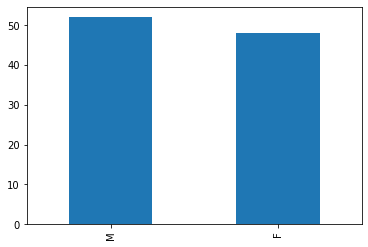

In [44]:
gt.plot.bar()

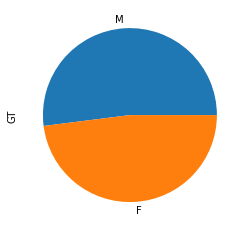

In [45]:
gt.plot.pie()

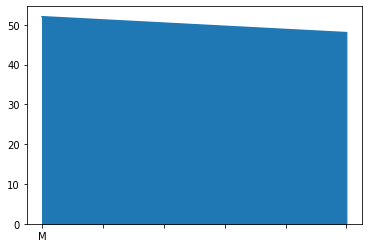

In [46]:
gt.plot.area()

1. Hãy trình bày dữ liệu lần lượt các biến: US_TBM1, US_TBM2 và US_TBM3

In [48]:
us1 = dlxtdh['US_TBM1'].value_counts()
us1

2.048    3
2.972    2
2.276    2
2.720    2
2.724    2
        ..
2.176    1
2.480    1
2.108    1
1.984    1
1.616    1
Name: US_TBM1, Length: 90, dtype: int64

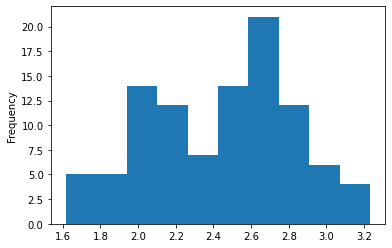

In [64]:
dlxtdh['US_TBM1'].plot.hist()

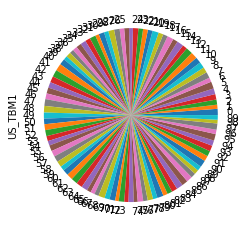

In [67]:
dlxtdh['US_TBM1'].plot.pie()

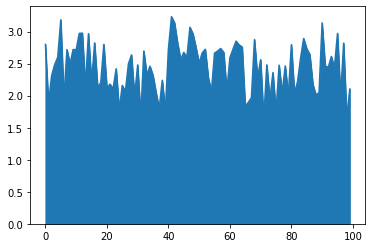

In [68]:
dlxtdh['US_TBM1'].plot.area()

In [56]:
us2 = dlxtdh['US_TBM2'].value_counts()
us2

3.028    2
2.900    2
2.652    2
2.208    2
2.188    2
        ..
2.528    1
2.128    1
2.548    1
2.968    1
2.228    1
Name: US_TBM2, Length: 91, dtype: int64

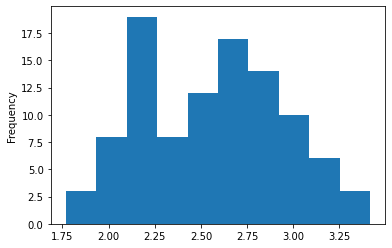

In [69]:
dlxtdh['US_TBM2'].plot.hist()

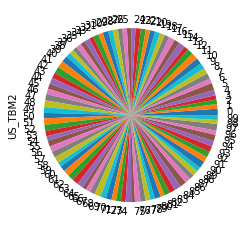

In [70]:
dlxtdh['US_TBM2'].plot.pie()

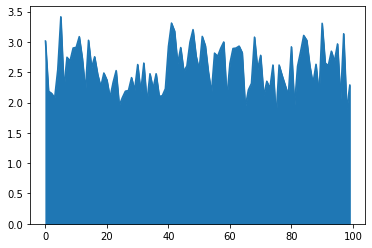

In [71]:
dlxtdh['US_TBM2'].plot.area()

In [57]:
us3 = dlxtdh['US_TBM3'].value_counts()
us3

2.688    2
2.636    2
2.812    2
2.752    2
2.504    2
        ..
2.632    1
2.096    1
2.432    1
3.200    1
3.000    1
Name: US_TBM3, Length: 91, dtype: int64

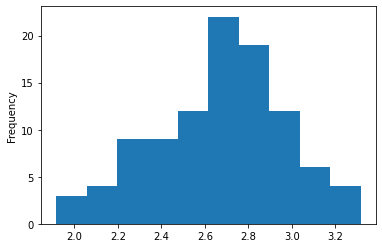

In [72]:
dlxtdh['US_TBM3'].plot.hist()

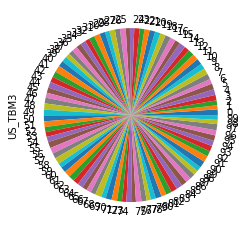

In [73]:
dlxtdh['US_TBM3'].plot.pie()

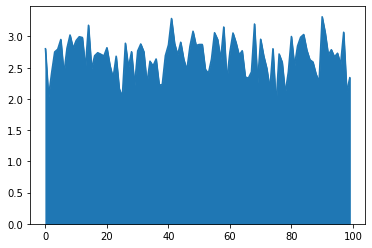

In [74]:
dlxtdh['US_TBM3'].plot.area()

2. Hãy trình bày dữ liệu biến DT với các học sinh là nam

In [76]:
dlxtdh[dlxtdh.GT=='M'].groupby(['DT','GT']).agg({'GT':'count'}).rename(columns={'GT':'COUNT'})

,,COUNT
DT,GT,
0.0,M,50
1.0,M,1
6.0,M,1


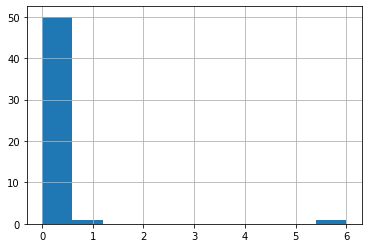

In [79]:
dlxtdh.loc[(dlxtdh.GT=='M'),'DT'].hist()